# Convolutions and image processing

# Facemorpher

I wanted to use this with Marilyn

[github](https://github.com/alyssaq/face_morpher)


Here is the [doc](http://alyssaq.github.io/face_morpher/).


It took me 2h to install it.
But after that it was easy to use...

----

Must be a GPL problem...

```sudo apt-get install g++```

create a virtual environment and install into it

- ```conda create --name opencv-env python=3.6
conda activate opencv-env```
- ```pip install opencv-contrib-python```
- ```pip install facemorpher```

surprisingly the environment is really empty so...

- ```conda install -c intel scikit-learn```


install the kernel in jupyter

- ```conda install -c anaconda ipykernel```
- ```python -m ipykernel install --user --name=opencv-env```

---

---

### what about this ?

https://github.com/spmallick/learnopencv/blob/master/FaceMorph/faceMorph.py


or 

[this project](https://ccrma.stanford.edu/~jacobliu/368Report/index.html)

or 

- [this code](https://github.com/YutaMiyake/morphing)
- [notebook](https://github.com/YutaMiyake/morphing/blob/master/morphing.ipynb)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import facemorpher as fm
import imageio
import cv2

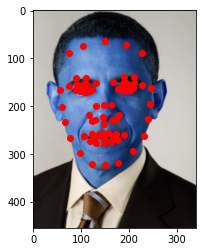

In [116]:
img = cv2.imread('./obama2.png')
X,Y = fm.locator.face_points(img).T
plt.imshow(img);
plt.plot(X,Y, 'ro');

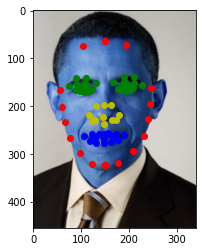

In [138]:
pts = fm.locator.face_points(img)

plt.imshow(img);
X,Y = pts[:16].T
plt.plot(X,Y, 'ro');
X,Y = pts[16:48].T
plt.plot(X,Y, 'go');
X,Y = pts[48:59].T
plt.plot(X,Y, 'yo');
X,Y = pts[59:-2].T
plt.plot(X,Y, 'bo');

In [107]:
pp = fm.morpher(['./marilyn_w.png','./obama_w.png'],
                 num_frames= 60,
                out_video='xx.avi' )

./marilyn_w.png
./obama_w.png
xx.avi saved


79

In [139]:
! ../.g


[master 3e7be5d] web
 1 file changed, 15 insertions(+), 17 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 26.83 KiB | 1.12 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   405fc9b..3e7be5d  master -> master


---  

# Rewrite 

- using signal.convolve
- skimage.io

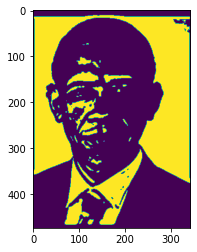

In [103]:
from skimage import io
import scipy.signal

img = io.imread( "./marilyn.png", as_gray=True)

img = io.imread( "./obama2.png", as_gray=True)

dd = 4

kernel = -20*np.ones((5*dd,1*dd)) 
kernel[2*dd:4*dd] = 40
kernel /= kernel.sum()

#V = np.array([1,0,-1])
#kernel = np.vstack([V, -2*V, V])


img_conv = scipy.signal.convolve2d( img, 
                                 kernel, 
                                 boundary='fill')

output = np.copy(img_conv)
#the values are float
mask = output > .7
output[ mask] = 1.
output[~mask] = 0

plt.imshow(output);

---

## Varying the parameter in mask

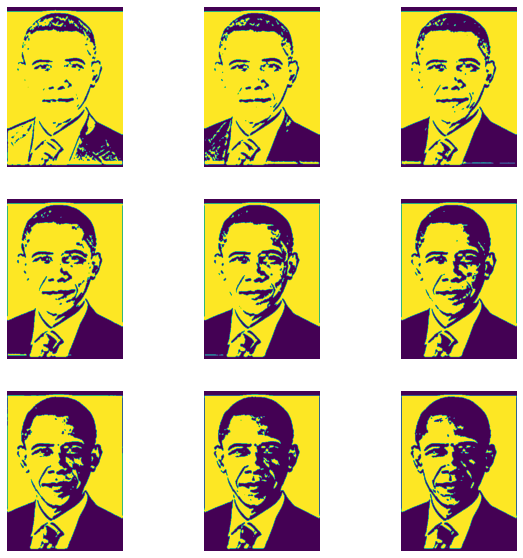

In [104]:
imgs = []
for k in np.linspace(.05,.5, 9):
    output = np.copy(img_conv)
    #the values are float
    mask = output > k
    output[ mask] = 1.
    output[~mask] = 0
    imgs.append(output)
    
num_rows, num_cols = 3,3
fig, axs = plt.subplots(num_rows, num_cols)
fig.set_size_inches(10,10)

axs = axs.ravel()
for ax,pic in zip(axs, imgs):
    ax.set_axis_off() 
    ax.imshow(pic)
    


---

##  Interpolating between endpoints

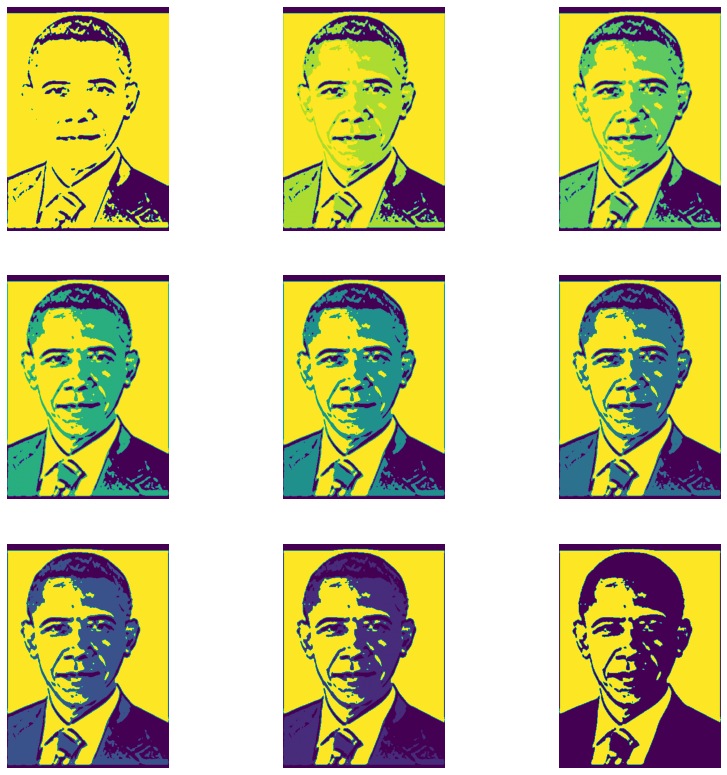

In [105]:
num_rows, num_cols = 3,3
fig, axs = plt.subplots(num_rows, num_cols)
fig.set_size_inches(14,14)

axs = axs.ravel()
    
for ax in axs:
    ax.set_axis_off() 
 
for t, ax in zip(np.linspace(0,1,9), axs):
    ax.imshow(t*imgs[-1] + (1-t)*imgs[0]);

---

##  Colors

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


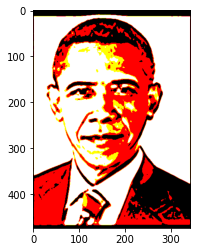

In [115]:
x,y = imgs[0].shape

rgb = np.ones((x,y,3))


rgb[:,:,0] = 1*imgs[0]
rgb[:,:,1] = 1*imgs[-3]
rgb[:,:,2] = imgs[-1]

plt.imshow(rgb)
imageio.imsave('obama_w.png', rgb)

In [96]:
! ../.g

[master 9f33c25] web
 2 files changed, 172 insertions(+), 34 deletions(-)
Counting objects: 5, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 29.02 KiB | 550.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   108729e..9f33c25  master -> master


# Exo 

1.Try and compare the difference between the images

- subtract the arrays remember they are vectors
- calculate the $\|.\|_1$ distance
- calculate the $\|.\|_2$ distance
    
2. Change the kernel
  - so that it smooths/blurs the image.
  - use the Sobel kernel $\begin{pmatrix}
1 & 0 & −1 \\
2 & 0 & −2 \\
1 & 0 & −1
\end{pmatrix}$


3. Change the value of ```size``` below what happens ?
Fix it so it works.

4. What happens if we smooth a fractal like the Koch curve ?

---


5. Can you find a way of getting the original image back from the convolution ? 


Think about this then look at [this notebook](./conv_kernels.ipynb)



---


# Convolution applied to a curve

There is a problem. Can u see why this doesn't work ?

# this works

what is happening ?

---

# Game of life

I am going to program this using a convolution and boolean masks.

### References

[a blog](https://nicholasrui.com/2017/12/18/convolutions-and-the-game-of-life/#:~:text=The%20Game%20of%20Life%20is,its%20neighbors%20must%20be%20alive.)

---

The state of the game is represented by a 2D array ```G``` of integers 
$\in \{ 1,0 \}$.
- 0 is dead.
- 1 is alive.

There are four rules in the [game of life](https://fr.wikipedia.org/wiki/Jeu_de_la_vie#R%C3%A8gles).
We apply a convolution to G to obtain H 
which calculates the number of neighbors.


Now we modify the values in H so that they are either 0 or 1 :

- H[H<=2] = 0
- H[(H==4)&(G==0) ] = 0
- H[H>4] = 0
- H[H>0] = 1

---

### Test Code

I have coded a [planeur](https://fr.wikipedia.org/wiki/Planeur_(jeu_de_la_vie))
to test the code.

---

## Animation

I'm going to make an animation. 

- The helper functions  to do this  are in the next cell. 
- You should install [ffmpeg](https://ffmpeg.org/download.html).


In [69]:
import  matplotlib.animation
from matplotlib import animation

from IPython.display import HTML

##Animation code

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

## Set up 

- random starting configuration G
- the kernel K

In [87]:
K = np.ones((3,3))
K[1,1] = 0
K

array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

---

# Exo

My code works but my  kernel  K 

``` 
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])
```

doesn't calculate the number of neighbors.

There should be a 0 in the middle like this


``` 
array([[1., 1., 1.],
       [1., 0, 1.],
       [1., 1., 1.]])
```

---

1. Modify the code to use this kernel
1. According to the wikipedia :

L'état suivant d'une cellule est : (S = 3) OU (E = 1 ET S = 2).

Avec :

S : nombre actuel de cellules vivantes dans son voisinage (entier naturel compris entre 0 et 8 inclus) ;
E : état actuel de la cellule (entier naturel égal à 0 pour une cellule morte et égal à 1 pour une cellule vivante).

Rewrite the code to use this rule and so that there are just 3 lines in th ```for``` loop.


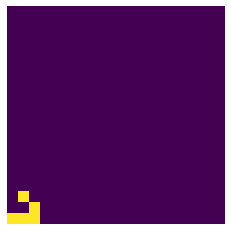

In [119]:
import  scipy 

E = np.zeros((20,20), dtype=np.int0)
#G[3,4:7] = 1
#G[3:5,3:5] = 1

#G[3,4:7] = 1
#G[4,5:8] = 1

#this is a planeur/glider to test

E[4,5:8] = 1
E[3,7] = 1
E[2,6] = 1

#E = np.random.randint(0, high=2, size=(20,20))

frames = []
for k in range(300):
    S = scipy.signal.convolve2d( E, K, boundary='wrap')[1:-1,1:-1]
    KK = np.zeros_like(S)
    KK[(S == 3) | (E == 1 ) & (S == 2)] = 1
    E = KK
    frames.append(np.copy(E))
    
HTML(plot_images(frames).to_html5_video())

In [173]:
! ../.g

[master 7641183] web
 1 file changed, 60 insertions(+), 83 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 209.26 KiB | 4.87 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   4facb17..7641183  master -> master
